In [1]:
#Importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

#importing the cleaned dataset
df = pd.read_csv('cleaned_cardio_train.csv')
print(df.head())



   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   8  21914       1     151    67.0    120     80            2     2      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


## Feature Selection

In this section, we'll discuss feature selection, a crucial step in machine learning model development. Feature selection involves choosing the most relevant features from the dataset to improve model performance, reduce overfitting, and enhance interpretability.

The following code snippet demonstrates how to perform feature selection using the dataset `df`. We'll define a list of feature names (`fn`) excluding the target variable, `cardio`. Then, we'll assign the features to `X` and the target variable to `y` for further analysis and modelineatures.

In [2]:
#feature selection
fn = df.keys().tolist() [:-1] 
X = df[fn] 
y = df['cardio']


### Splitting Data for Training and Testing

In this code snippet, the dataset is being split into training and testing sets using the `train_test_split` function from scikit-learn. This is a common practice in machine learning to evaluate the performance of a model.

- `X`: Represents the features or input variables of the dataset.
- `y`: Represents the target variable or labels.
- `test_size=0.3`: Specifies that 30% of the data will be reserved for testing, while 70% will be used for training.
- `random_state=1`: Sets a seed for the random number generator to ensure reproducibility. This means that each time you run this code, the same data points will be assigned to the training and testing sets.

After running this code, four variables are created:
- `X_train`: Contains the features for training the model.
- `X_test`: Contains the features for testing the model.
- `y_train`: Contains the corresponding labels for training.
- `y_test`: Contains the corresponding labels for testing.

These variables can then be used to train a machine learning model on the training data and evaluate its performance on the testing data.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


## Building a Decision Tree Classifier

Now that we've selected our features, it's time to construct a Decision Tree Classifier, a popular machine learning algorithm. Decision trees are intuitive models that make decisions by following a tree-like structure based on feature values.

Here's a breakdown of what we're about to do:

1. **Creating the Decision Tree Classifier Object**: We'll initialize a decision tree classifier object (`clf`) to serve as our model.

2. **Training the Classifier**: Using our training data (`X_train` and `y_train`), we'll train the classifier to learn patterns and relationships between features and the target variable.

3. **Making Predictions**: Once trained, we'll use the classifier to predict the target variable for our test dataset (`X_test`). These predictions will help us evaluate the performance of our model.

Let's dive into the code:


In [4]:
# Creating the decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predicting the response for the test dataset
y_pred = clf. predict (X_test)




In [5]:
print("accuracy", metrics.accuracy_score(y_test, y_pred))


accuracy 0.6370370370370371


Confusion matrix is a tool used to evaluate the performance of a classification model. The matrix compares the actual target values (True labels) with those predicted by the model (Predicted labels). In this case:

|                    | Predicted Class 0 | Predicted Class 1 |
|--------------------|-------------------|-------------------|
| Actual Class 0     | 34 (True Negatives)  | 31 (False Positives) |
| Actual Class 1     | 21 (False Negatives) | 49 (True Positives)  |

This matrix suggests that the model is better at identifying true class "1" instances than class "0", considering the higher number of true positives for class "1". The color intensity and the bar on the right indicate the frequency of predictions, with darker colors showing a higher number of occurrences in that cell of the matrix.
the plot (optional).


[[36 29]
 [20 50]]


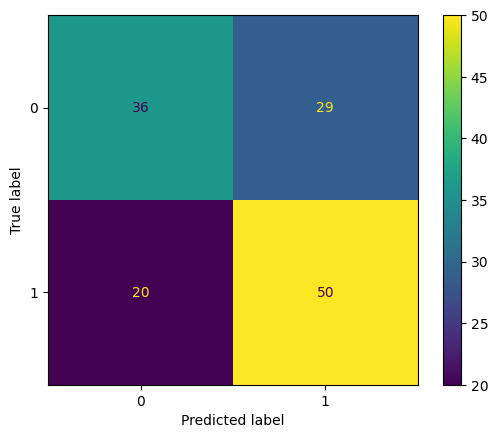

In [6]:
#computing and printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

cn = df['cardio'].unique() #classes names

#creating a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)



### Visualizing Decision Tree Classifier

This code snippet creates a decision tree plot using `matplotlib`. It visualizes the decision tree model (`clf`) trained on some data. 

1. **Creating the tree plot:**
    - The `plot_tree` function from the `tree` module is used to generate the plot.
    - Parameters:
        - `clf`: The trained decision tree classifier.
        - `feature_names`: Names of the features used in the model.
        - `class_names`: Names of the classes or target labels.
        - `filled`: If True, the nodes are colored according to the majority class.
        - `fontsize`: Font size of the text in the plot.
        - `max_depth`: Maximum depth of the tree to be visualized. (Optional, can be adjusted as needed)
        
2. **Saving the tree plot:**
    - The `savefig` method saves the generated figure as an image file named 'c

# Decision Tree Structure
The tree structure consists of nodes and branches, where each node represents a feature that is used to split the data into two or more branches.

- The root node shows the initial feature that provides the most significant split of the data(ap_hi).
- Root Node:
- **Feature**: ap_hi
- **Gini**: 0.498
- **Samples**: 312
- **Value**: 146 Class 1, 166 Class 2
- **Predominant Class**: Class 1

- The branches from each node lead to either further decision nodes (where additional splits are made) or to leaf nodes, which represent the final decision outcomes (classes).
- Each node displays several pieces of information:
       - A condition or feature used to split the data (e.g., cholesterol < 1.5).
       - A 'gini' value, which indicates the purity of the node. A lower Gini index suggests a better separation of the classes at that node.
       - The 'samples' number, indicating how many instances of the dataset fall into that node.
       - A 'value' list, showing the distribution of classes among those samples.
       - The predominant class in that node is also indicated.

The final decisions (classes) are represented by the colors in the leaf nodes, which typically vary depending on the class proportions.Class A, 50 Class B, 50 Class C]
            - **Predominant Class**: Class B
proportions.
ardio_DT.png'.


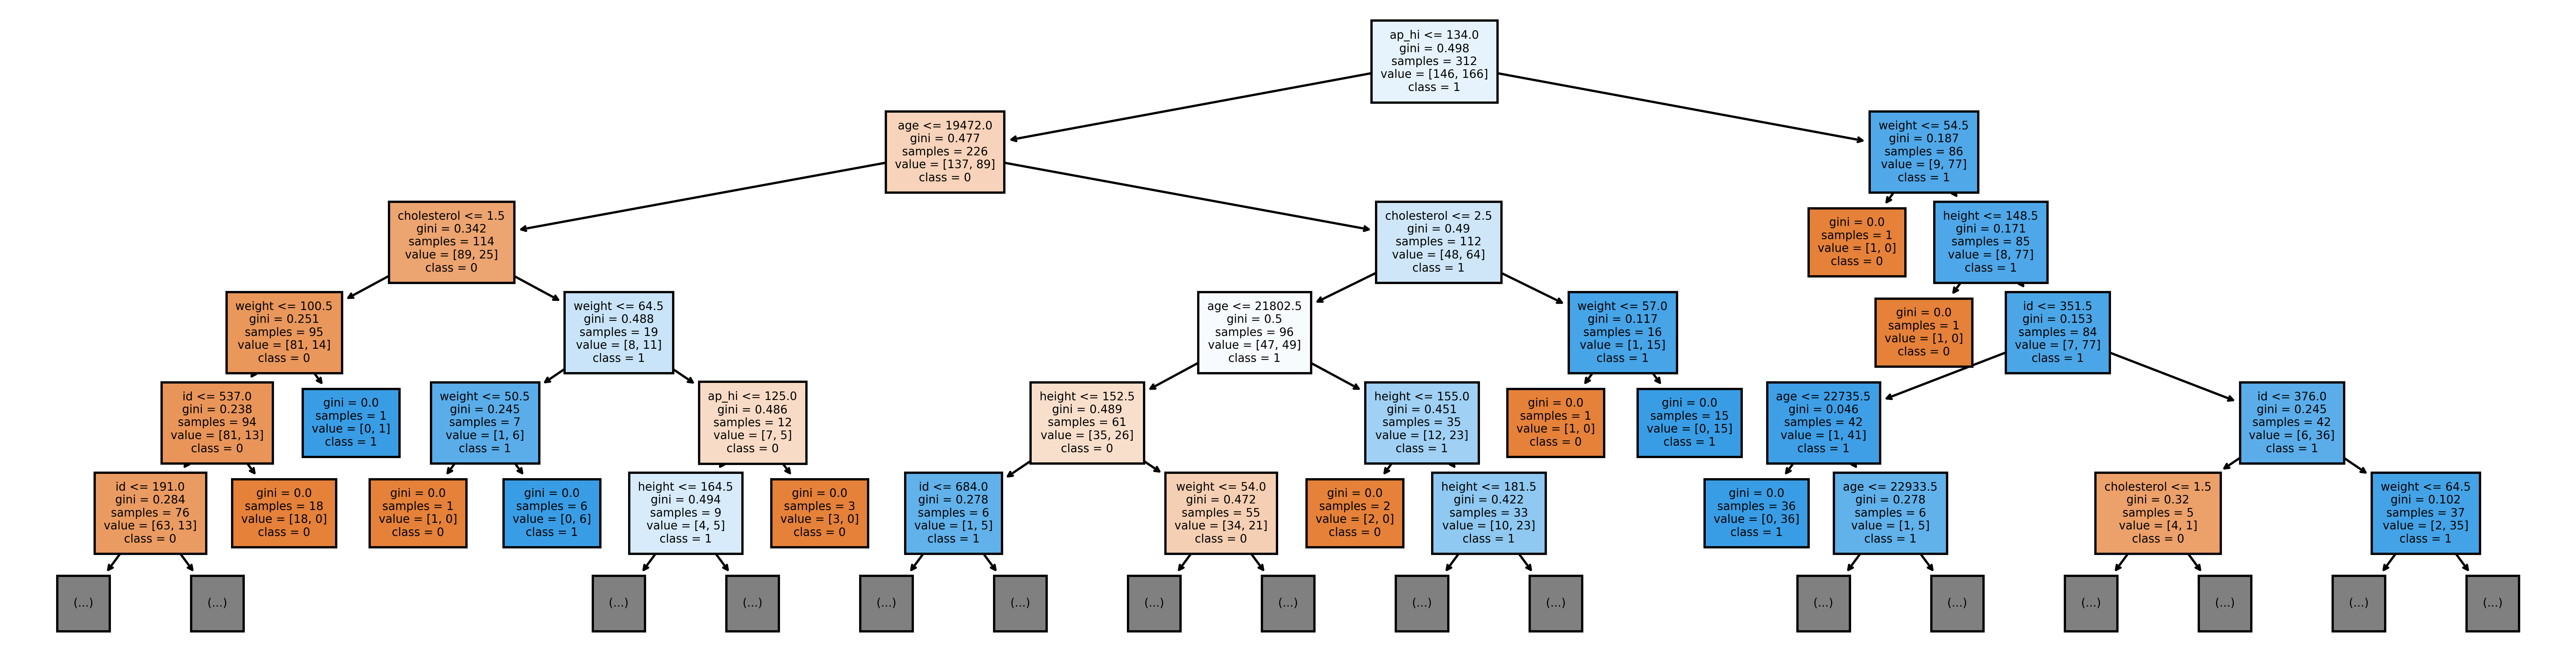

In [7]:
# Creating the tree plot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5), dpi=500)
tree.plot_tree(clf, feature_names = fn, class_names = cn.astype(str), filled = True, fontsize=5, max_depth=5); #max_depth can be adjusted 

# Saving the tree plot
fig.savefig('cardio_DT.png')

In [8]:
# Installing necessary libraries
%pip install numpy pandas matplotlib scikit-learn


In [9]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
# Importing the dataset
dataset = pd.read_csv('cleaned_cardio_train.csv')

# Extract the features (excluding the target variable 'cardio')
features = dataset.drop(columns=['cardio'])

# Selecting relevant features for clustering
X = dataset[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]

## Clustering Analysis of Patient Data

In this analysis, we will perform KMeans clustering on patient data to identify clusters based on various health-related features. The purpose of this analysis is to partition the patients into distinct groups based on their characteristics, which can provide valuable insights for healthcare professionals.

### Methodology:
- We will evaluate different sizes of K (number of clusters) using the silhouette score and the within-cluster sum of squares (WCSS) to determine the optimal number of clusters.
- The silhouette score measures the separation distance between the resulting clusters, while WCSS quantifies the compactness of the clusters.

### Analysis:

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


For K=3, the average silhouette score is: 0.5939253479202612
For K=3, the total within-cluster sum of squares (WCSS) is: 340956486.0489584


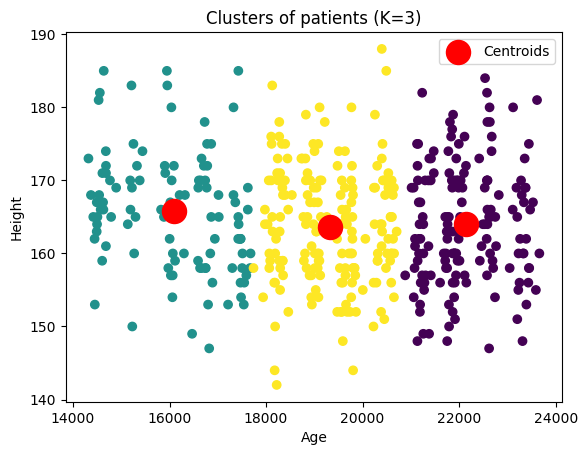

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For K=4, the average silhouette score is: 0.5637982684175373
For K=4, the total within-cluster sum of squares (WCSS) is: 201977400.13928506


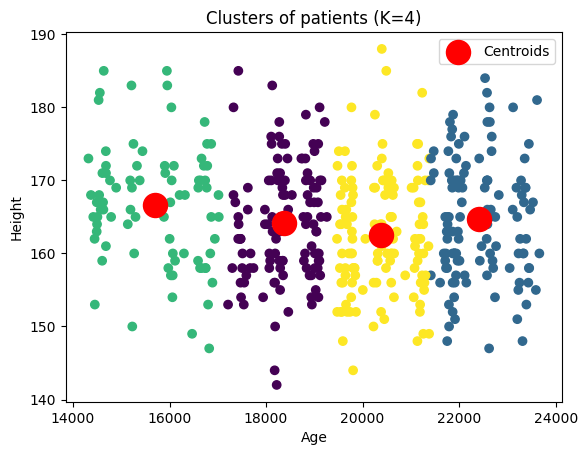

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For K=5, the average silhouette score is: 0.5628341501349845
For K=5, the total within-cluster sum of squares (WCSS) is: 133003663.1765145


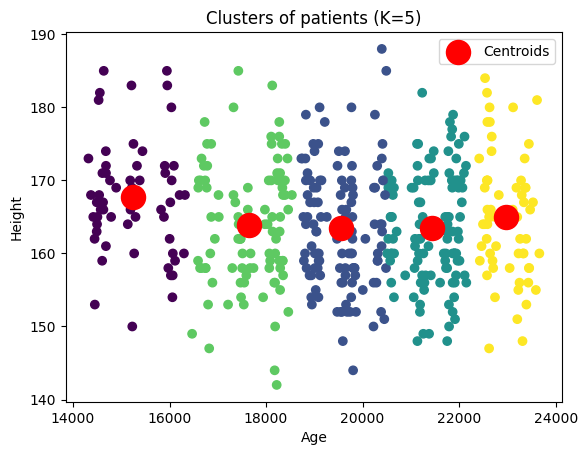

In [11]:
# Evaluating different sizes of K
k_values = [3, 4, 5]  # Choose at least three different sizes of K
silhouette_scores = []
wcss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)

    # Silhouette coefficient
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"For K={k}, the average silhouette score is: {silhouette_avg}")
    
    # Elbow method
    wcss = kmeans.inertia_
    wcss_values.append(wcss)
    print(f"For K={k}, the total within-cluster sum of squares (WCSS) is: {wcss}")
   
    # Visualizing the clusters
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.title(f'Clusters of patients (K={k})')
    plt.xlabel('Age')
    plt.ylabel('Height')
    plt.legend()
    plt.show()




|   K   | Silhouette Score |      WCSS       |
|-------|------------------|-----------------|
|   3   |      0.5939      | 340956486.0489  |
|   4   |      0.5638      | 201977399.5765  |
|   5   |      0.5628      | 133003694.1055  |


## Findings from Clustering Analysis

The clustering analysis was performed using the KMeans clustering algorithm with different values of K. Here are the key findings:

### Silhouette Scores:

- The silhouette scores for different values of K are relatively high, ranging from around 0.56 to 0.59. This indicates that the clusters are well-separated from each other, with data points tightly clustered within the same cluster and well-separated from other clusters.

### Within-Cluster Sum of Squares (WCSS):

- WCSS represents the sum of squares of the distances of each data point in all clusters to their respective centroids. It quantifies the "compactness" of the clusters.
- Lower values of WCSS indicate tighter clusters, as data points within each cluster are closer to the centroid of that cluster.

Based on the analysis of silhouette scores and within-cluster sum of squares (WCSS) for different values of K:

- The silhouette score, which measures the separation between clusters, is highest for K=3. This suggests that the clusters are relatively well-separated for this value of K.
- The within-cluster sum of squares (WCSS) decreases as K increases, but the rate of decrease slows down after K=3. This indicates that adding more clusters beyond K=3 does not significantly improve the compactness ofGiven these observations, it's evident that the dataset exhibits clear patterns of differentiation, particularly with the highest silhouette score observed for K=3. Therefore, it is reasonable to assert that partitioning the dataset into **3 clusters** is the most appropriate choice. This decision is supported by the significant separation between clusters and the diminishing returns in cluster compactness beyond K=3, as evidenced by the slowing rate of decrease in the within-cluster sum of squares (WCSS). Hence, **3 clusters** provide a robust and meaningful segmentation of the data, capturing distinct groups while avoiding unnecessary complexity.
oning the dataset.
ities.
ted features.


## Plotting Silhouette Coefficient and Elbow Method

In this section, we will visualize the Silhouette Coefficient and the Elbow Method for different values of K to determine the optimal number of clusters.

### Methodology:

- The Silhouette Coefficient measures the separation distance between the resulting clusters, with higher values indicating better-defined clusters.
- The Elbow Method helps to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters. We look for the "elbow" point where the rate of decrease in WCSS slows down.

### Analysis:

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


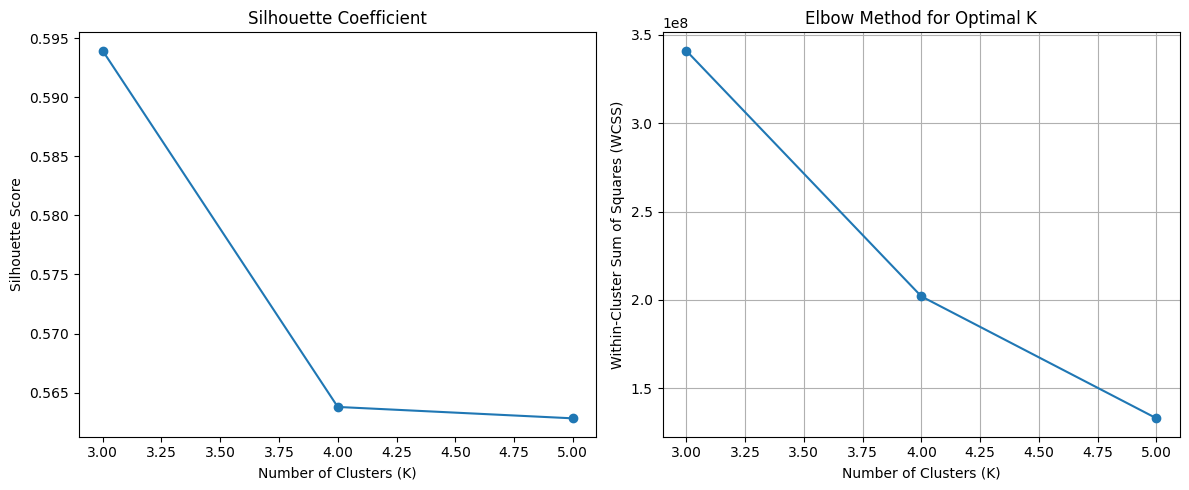

In [12]:
# Plotting Silhouette Coefficient and Elbow Method for different K values
silhouette_scores = []
wcss_values = []
k_range = [3, 4, 5]  # Range of K values

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    wcss_values.append(kmeans.inertia_)

# Plot the Silhouette Coefficient
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Plot the Elbow Curve
plt.subplot(1, 2, 2)
plt.plot(k_range, wcss_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Analysis Summary

Based on the results of the Silhouette Coefficient and the Elbow Method:

- The Silhouette Coefficient indicates that the clusters are relatively well-separated, with scores ranging from 0.56 to 0.59.
- The Elbow Method suggests that the optimal number of clusters could be around 3 or 4, as there is a significant decrease in the within-cluster sum of squares (WCSS) up to those points, after which the decrease becomes less pronounced.
